<a href="https://colab.research.google.com/github/paladugulashruthi/NNDL/blob/main/assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy import stats

In [2]:
df = pd.read_excel("/content/drive/MyDrive/pressure_weight.xls")
df.head()

FileNotFoundError: ignored

In [5]:
k= np.abs(stats.zscore(df))
print(k)

NameError: ignored

In [4]:
sb.boxplot(x=df['X'])

NameError: ignored

In [7]:
sb.boxplot(y=df['Y'])

NameError: ignored

In [8]:
p_df = df[(k < 3).all(axis=1)]
p_df.head()

NameError: ignored

In [9]:
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)

    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

NameError: ignored

In [10]:
data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

NameError: ignored

In [11]:
new_data=df.copy()
new_data = (new_data - new_data.min())/(new_data.max() - new_data.min())
new_data.head()

NameError: ignored

In [12]:
train_data,test_data = train_test_split(new_data,train_size=0.9)
print(len(train_data))
train_data.head()

NameError: ignored

In [13]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')
err = []
#step 1 initialise values 
m1 = -1.0 
c1 = 1.0  #variable x, y
epoches=100
learning_rate = 0.1  #learning rate
for i in range(0,epoches):
    dfmv1 = 0
    dfcv1 = 0
    er = 0
    for j in range(0,len(x_val)):
        er +=  ((y_val[j] - (m1 * x_val[j]) - c1))**2
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1) 
        dfmv = dfmv.subs(c, c1) 
        dfmv = dfmv.subs(x, x_val[j]) 
        dfmv = dfmv.subs(y, y_val[j]) 
        dfmv = round(dfmv,2)
        dfcv = dfc.subs(c, c1) 
        dfcv = dfcv.subs(m, m1) 
        dfcv = dfcv.subs(x, x_val[j]) 
        dfcv = dfcv.subs(y, y_val[j]) 
        dfcv = round(dfcv,2)
        dfmv1 += dfmv
        dfcv1 += dfcv
    dfmv1 = dfmv1/len(x_val)
    dfcv1 = dfcv1/len(x_val)
    
    dfmv1 = round(dfmv1,2)
    dfcv1 = round(dfcv1,2)
    #step3 find change in x , y
    dm = (-1.0)*learning_rate*dfmv1
    dc = (-1.0)*learning_rate*dfcv1
    #step4 update variable 
    m1 = m1 + dm
    m1 = round(m1, 2) 
    c1 = c1 + dc
    c1 = round(c1, 2)
    er = (1/(2*len(train_data['X'])))*(er)
    err.append(er)
    #step5 increment iterations 
    #step6 break loop if iterations exceed no of epoches
#step7 print variable x1, y1
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')

first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y


NameError: ignored

In [14]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),color='blue')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),marker='+',color='deeppink')
plt.title('predicted data vs actual data')

NameError: ignored

ValueError: ignored

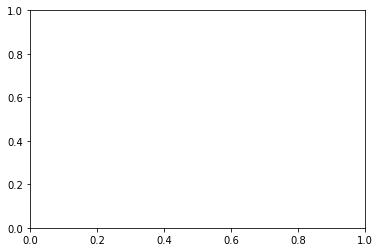

In [15]:
iters = np.arange(epoches)
plt.plot(iters,err,color='red')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error rate ")
plt.grid()

In [16]:
test_data_pred = m1 *test_data['X'] + c1
test_mse = mean_squared_error(test_data['Y'],test_data_pred)
test_mse

NameError: ignored

In [17]:
plt.scatter(test_data['X'],test_data['Y'],marker='+',color='blue')
plt.plot(test_data['X'],test_data_pred,color='deeppink')
plt.grid()

NameError: ignored

In [18]:
x_min = df['X'].min()
x_max = df['X'].max()
y_min = df['Y'].min()
y_max = df['Y'].max()

NameError: ignored

In [20]:
x =x1 = float(input("enter pressure of liquid nitrogen value :"))
x = (x - x_min)/(x_max - x_min)
y = m1*x + c1
y = y*(y_max - y_min) + y_min
print(f"weight of liquid nitrogen based on its pressure {x1} is : {y}")

KeyboardInterrupt: ignored